In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import matplotlib


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [218]:
train_df = pd.read_csv('~/Documents/Bootcamp/Project_3_ML/train.csv')

In [219]:
test_df = pd.read_csv('~/Documents/Bootcamp/Project_3_ML/test (1).csv')

In [220]:
#columns with NAs in train set
train_df.columns[train_df.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [221]:
#columns with NAs in test set 
test_df.columns[test_df.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [222]:
train_nas = np.sum(train_df.isnull())
train_nas[train_nas > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [223]:
train_df.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
5       2009
6       2007
7       2009
8       2008
9       2008
10      2008
11      2006
12      2008
13      2007
14      2008
15      2007
16      2010
17      2006
18      2008
19      2009
20      2006
21      2007
22      2008
23      2007
24      2010
25      2009
26      2010
27      2010
28      2006
29      2008
        ... 
1430    2006
1431    2009
1432    2007
1433    2008
1434    2006
1435    2008
1436    2007
1437    2008
1438    2010
1439    2007
1440    2008
1441    2008
1442    2009
1443    2009
1444    2007
1445    2007
1446    2010
1447    2007
1448    2007
1449    2006
1450    2009
1451    2009
1452    2006
1453    2006
1454    2009
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

# EDA

In [224]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [225]:
print('The shape of our features is:', train_df.shape)

The shape of our features is: (1460, 81)


Text(0,0.5,'# NAs')

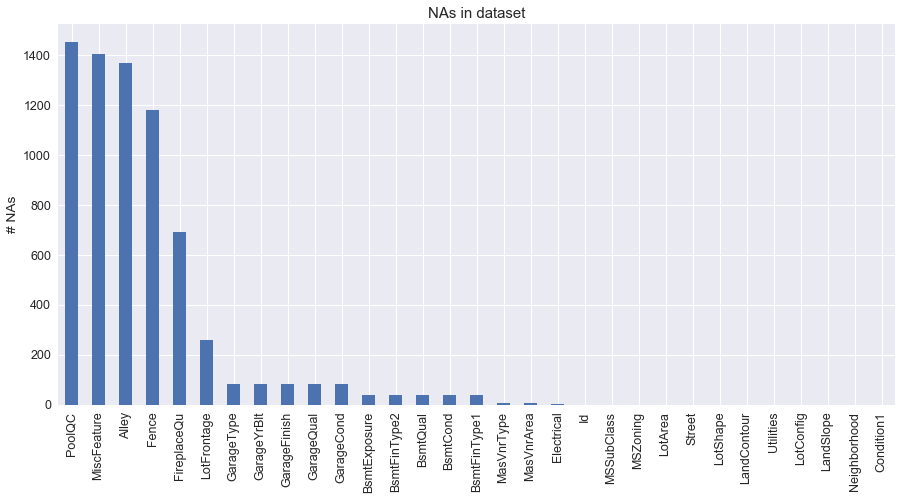

In [226]:
#NAs in dataset by column 
train_nas = np.sum(train_df.isnull())
train_nas[train_nas > 0]


plot1 = train_nas.nlargest(31).plot(kind='bar', \
               title='NAs in dataset', figsize=(15,7))
plot1.set_ylabel('# NAs')

Text(0,0.5,'SalePrice')

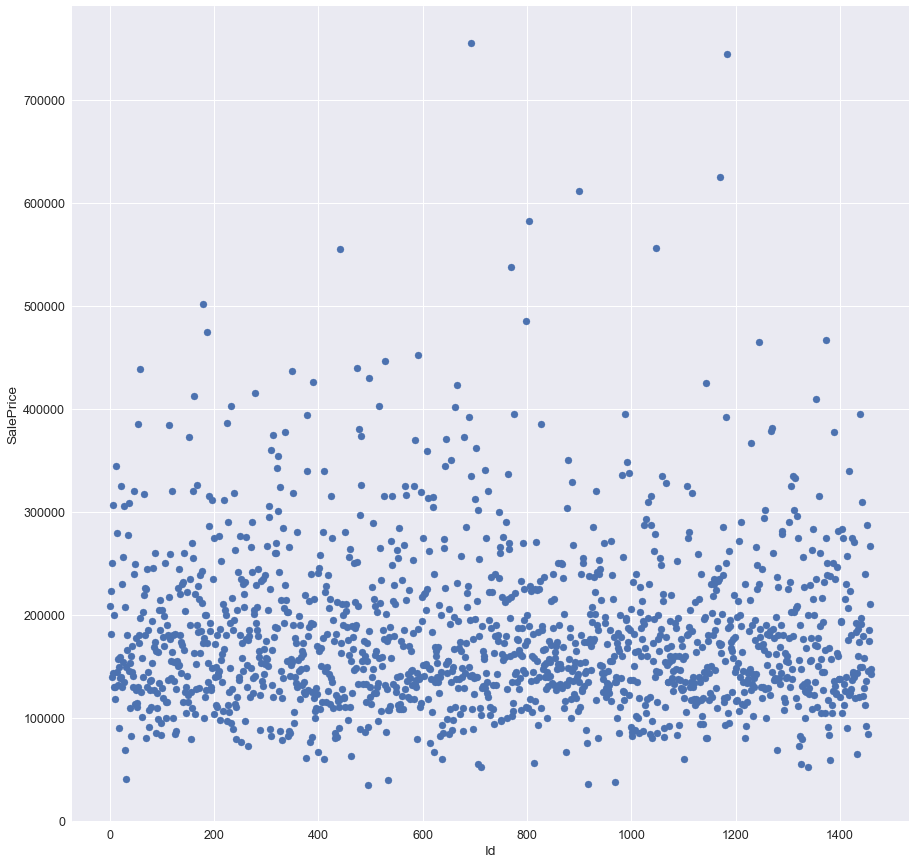

In [227]:
n = 0
plt.figure(figsize=(15,15))
plt.scatter(train_df.iloc[:,n],train_df['SalePrice'])
plt.xlabel(train_df.columns[n])
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

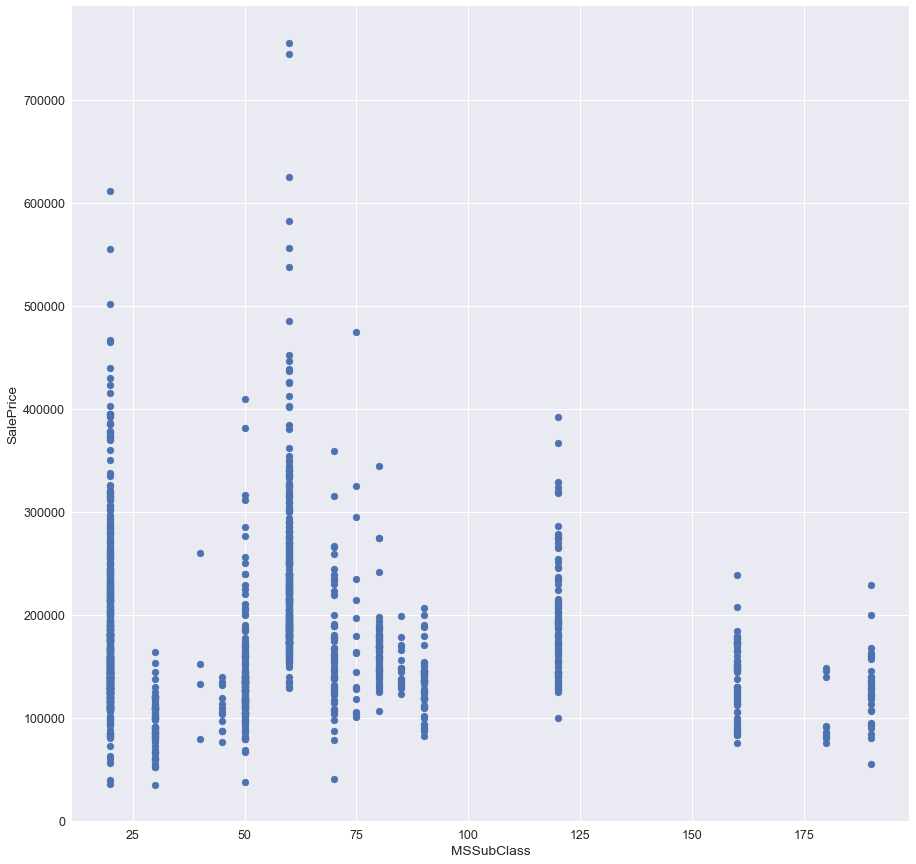

In [228]:
n = 1
plt.figure(figsize=(15,15))
plt.scatter(train_df.iloc[:,n],train_df['SalePrice'])
plt.xlabel(train_df.columns[n])
plt.ylabel('SalePrice')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


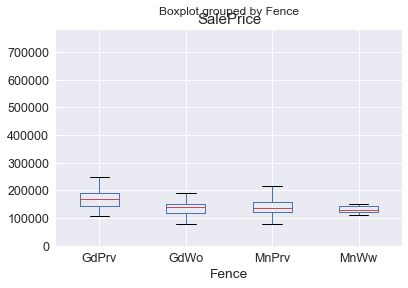

In [229]:
train_df.boxplot(column='SalePrice', by='Fence')

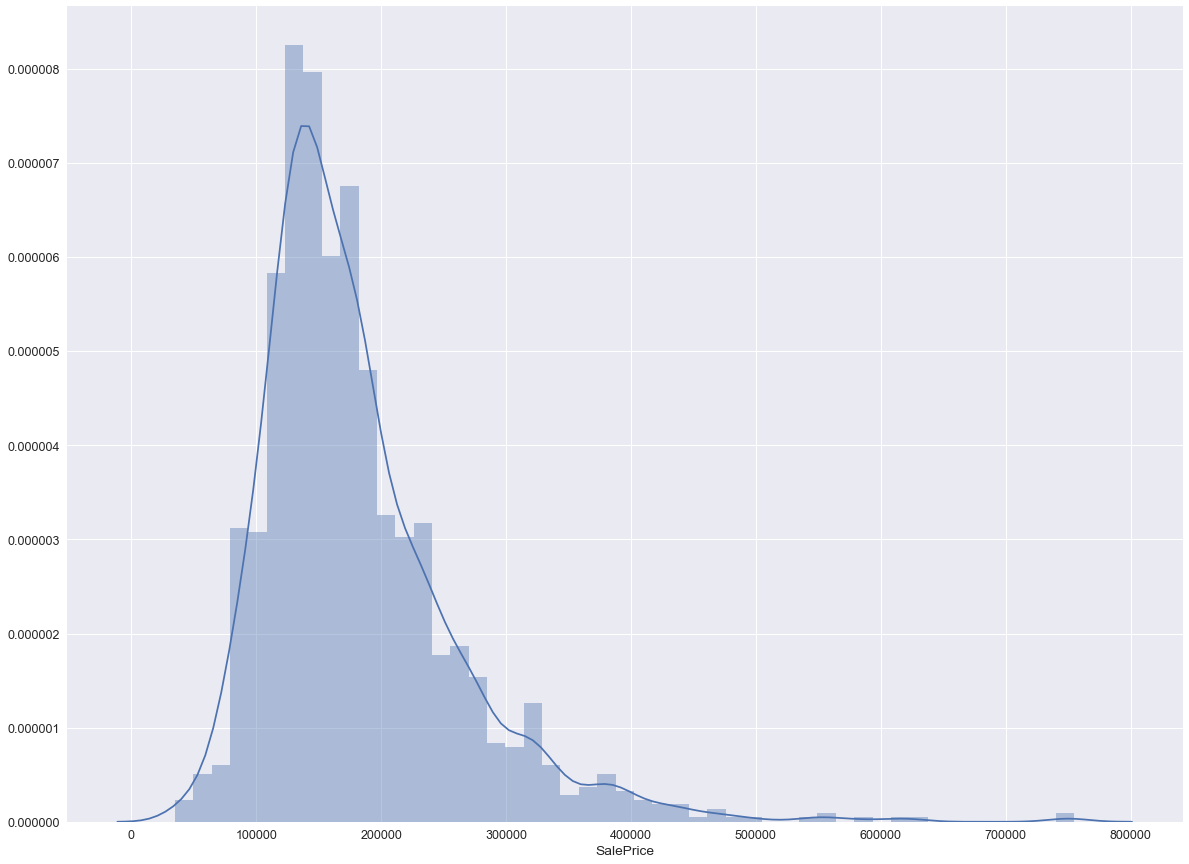

In [230]:
plt.subplots(figsize=(20,15))
sns.distplot(train_df.SalePrice)
#sale price data is positive skewed 

Text(0,0.5,'SalePrice')

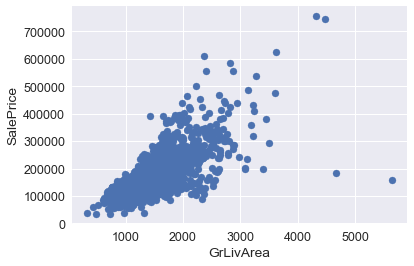

In [231]:
#description text tells us there are outliers. specifically with sale price and GrLivArea 
#plot shows us 2 outliers on bottom right of scatterplot where GrLivArea is very large but sale price is extremely low
n = 46
plt.scatter(train_df.iloc[:,n],train_df['SalePrice'])
plt.xlabel(train_df.columns[n])
plt.ylabel('SalePrice')

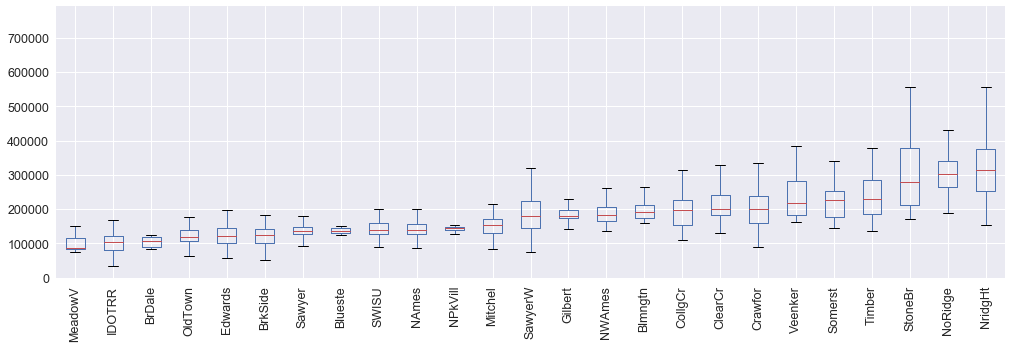

In [232]:

#creating pandas boxplot and usinfg function to sort values
def boxplot_sorted(df, by, column, rot=90):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", figsize = (17,5))
axes = boxplot_sorted(train_df, by=["Neighborhood"], column="SalePrice")

#train.boxplot(column = 'SalePrice', by ='Neighborhood', figsize = (17,8), rot = 90) #pandas boxplot unsorted

# log transformation of target variable sale price


 mu = 12.02 and sigma = 0.40



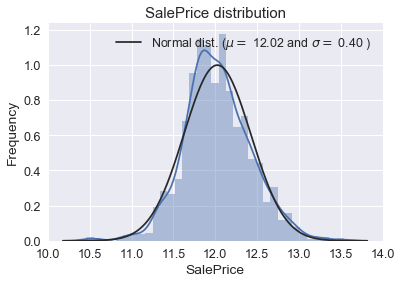

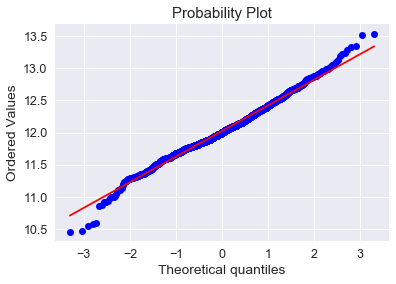

In [233]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [234]:
#train_df.loc[:,'MSSubClass':'SalePrice']

In [19]:

#sns.pairplot(train_df);

# Features Engineering - Filling in missing data

In [235]:
train_df.Alley=train_df.Alley.fillna("NoAlley")

In [236]:
train_df.BsmtQual=train_df.BsmtQual.fillna("NoBasement")

In [237]:
train_df.BsmtCond=train_df.BsmtCond.fillna("NoBasement")

In [238]:
train_df.BsmtFinType1=train_df.BsmtFinType1.fillna("NoBasement")

In [239]:
train_df.FireplaceQu=train_df.FireplaceQu.fillna("NoFireplace")

In [240]:
train_df.GarageType=train_df.GarageType.fillna("NoGarage")

In [241]:
train_df.GarageYrBlt=train_df.GarageYrBlt.fillna(0) #NEED TO CHANGE THIS TO MEDIAN VALUES

In [242]:
train_df.GarageFinish=train_df.GarageFinish.fillna("NoGarage")

In [243]:
train_df.GarageQual=train_df.GarageQual.fillna("NoGarage")

In [244]:
train_df.GarageCond=train_df.GarageCond.fillna("NoGarage")

In [245]:
train_df.PoolQC=train_df.PoolQC.fillna("NoPool")

In [246]:
train_df.Fence=train_df.Fence.fillna("NoFence")

In [247]:
train_df.MiscFeature=train_df.Fence.fillna("NoMisc")

In [248]:
train_df.loc[train_df.Id==949, 'BsmtExposure'] = 'No'

In [249]:
train_df.BsmtExposure=train_df.BsmtExposure.fillna("NoBasement")

In [250]:
train_df.loc[train_df.Id==333, 'BsmtFinType2'] = 'Rec'

In [251]:
train_df.BsmtFinType2=train_df.BsmtFinType2.fillna("NoBasement")

In [252]:
train_df.Electrical=train_df.Electrical.fillna("SBrkr")

In [253]:
train_df.MasVnrType=train_df.MasVnrType.fillna('None')

In [254]:
train_df.MasVnrArea=train_df.MasVnrArea.fillna(0)

In [255]:
train_df.shape

(1460, 81)

# Only NAs left at this point of notebook area for lotfrontage

In [256]:
train_df.columns[train_df.isnull().any()].tolist()


['LotFrontage']

# try skewness after filling nas

In [42]:
#numeric_feats = train_df2.dtypes[train_df2.dtypes != "object"].index

# Check the skew of all numerical features
#skewed_feats = train_df2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkew in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness

In [43]:
#skewness.Skew

In [44]:
#skewness = skewness[abs(skewness) > 0.75] # having skewness equal the absolute value since some values 
#are negative and for boxcox the values need to be positive. threshold for skewness is 0.75
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

In [45]:
#skewness = skewness.index

In [46]:
#train_df2[skewness] = np.log1p(train_df2[skewness])

In [47]:
#train_df2.apply(pd.Series.nunique)

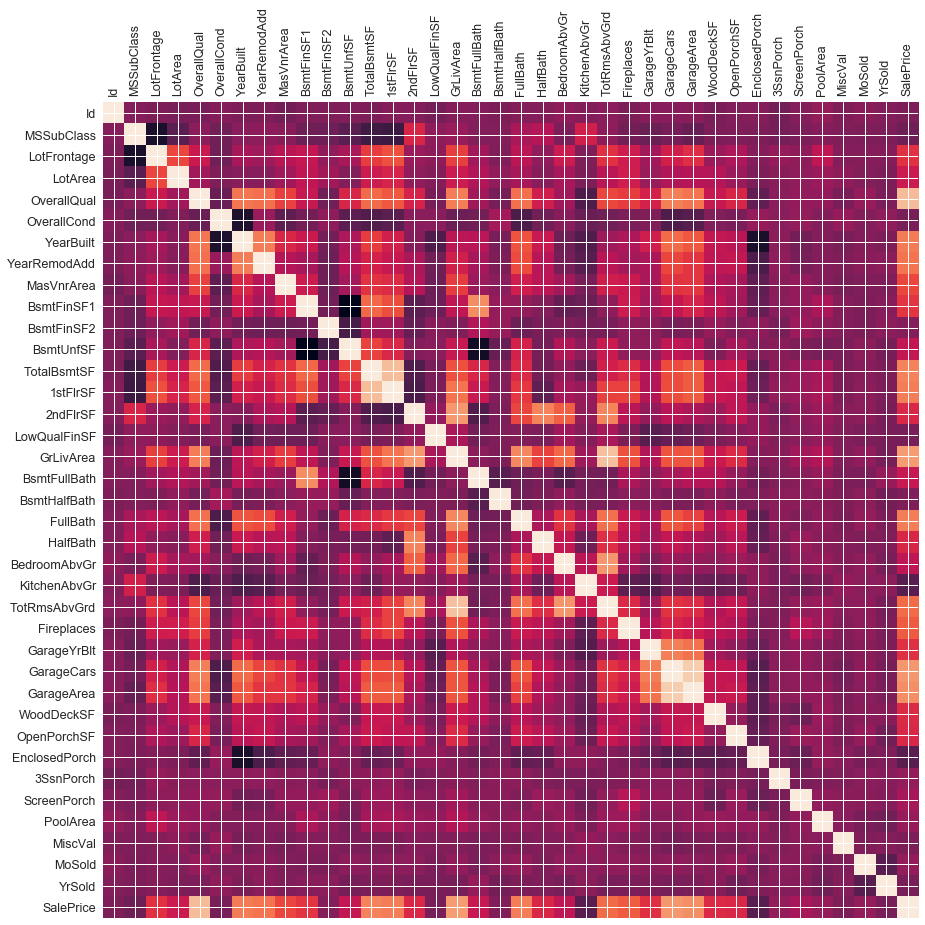

In [257]:
corr = train_df.corr()
fix, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);




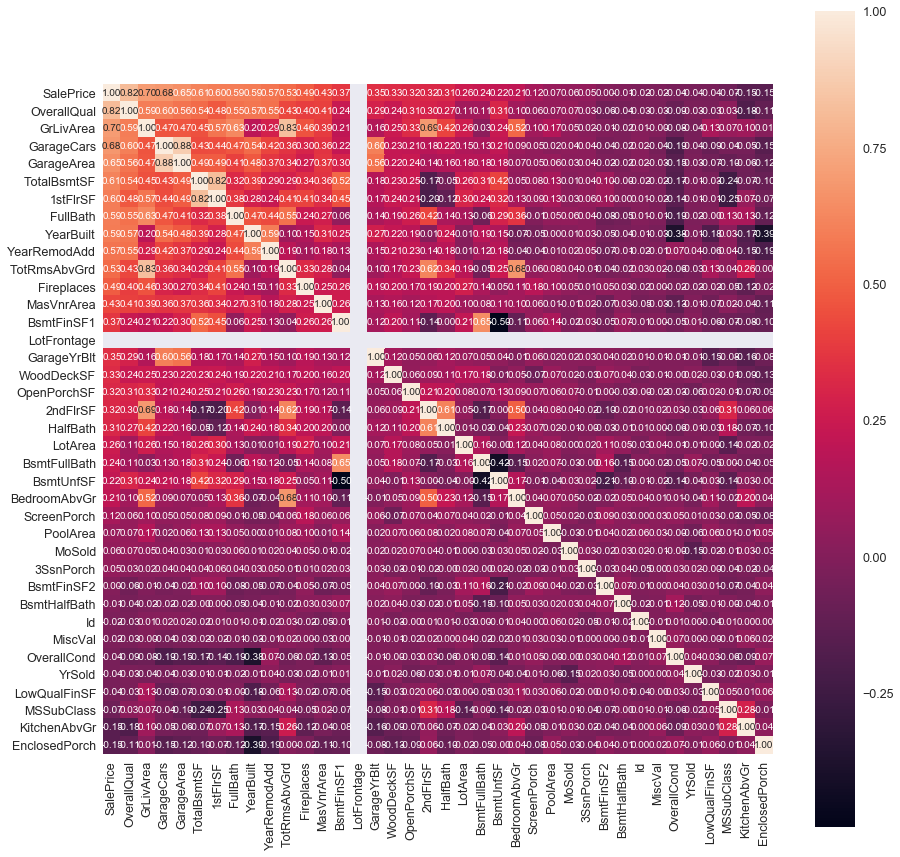

In [258]:
#saleprice correlation matrix
fix, ax = plt.subplots(figsize=(15,15))

corrmat = train_df.corr()
k = 50#number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



# Features engineering- changing categorical ordered values to numbers

In [259]:
train_df['LotShape']=train_df['LotShape'].replace(['IR3','IR2','IR1','Reg'],[0,0,0,1])

In [260]:
train_df['Utilities']=train_df['Utilities'].replace(['NoSeWa','AllPub'],[0,1])

In [261]:
train_df['LandSlope']=train_df['LandSlope'].replace(['Sev','Mod','Gtl'],[0,0,1])

In [262]:
train_df['ExterQual']=train_df['ExterQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [263]:
train_df['ExterCond']=train_df['ExterCond'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [264]:
train_df['BsmtQual']=train_df['BsmtQual'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [265]:
train_df['BsmtCond']=train_df['BsmtCond'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [266]:
train_df["BsmtExposure"]=train_df['BsmtExposure'].replace(['NoBasement','No','Mn','Av','Gd'],[0,1,2,3,4])

In [267]:
train_df['BsmtFinType1']=train_df['BsmtFinType1'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [268]:
train_df['BsmtFinType2']=train_df['BsmtFinType2'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [269]:
train_df['HeatingQC']=train_df['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [270]:
train_df['CentralAir']=train_df['CentralAir'].replace(['N','Y'],[0,1])

In [271]:
train_df['Electrical']=train_df['Electrical'].replace(['FuseP','FuseF','FuseA','Mix','SBrkr'],[0,1,2,3,4])

In [272]:
train_df['KitchenQual']=train_df['KitchenQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [273]:
train_df['Functional']=train_df['Functional'].replace(['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],[0,1,2,3,4,5,6,7])

In [274]:
train_df['FireplaceQu']=train_df['FireplaceQu'].replace(['NoFireplace','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [275]:
train_df['GarageQual']=train_df['GarageQual'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [276]:
train_df['GarageCond']=train_df['GarageCond'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [277]:
train_df['PoolQC']=train_df['PoolQC'].replace(['NoPool','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [278]:
train_df['GarageFinish']=train_df['GarageFinish'].replace(['NoGarage','Unf','RFn','Fin'],[0,1,2,3])

In [279]:
train_df["MSZoning"]=train_df['MSZoning'].replace(['C (all)','RM','RH','RL','FV'],[0,1,1,2,3])

In [280]:
train_df["LotConfig"]=train_df['LotConfig'].replace(['Inside','FR2','Corner','CulDSac','FR3'],[0,0,0,1,1])

In [281]:
train_df["MasVnrType"]=train_df['MasVnrType'].replace(['BrkCmn','None','BrkFace','Stone'],[0,0,1,1])

In [282]:
train_df['PavedDrive']=train_df['PavedDrive'].replace(['N','P','Y'],[0,1,2])

In [283]:
##train_df['FenceNum']=train_df['Fence'].replace(['NoFence','MnWw','GdWo','MnPrv','GdPrv'],[0,1,2,3,4]) 
#this one is categorized into almost two categories? goodwood/avg wood; privacy/minimum privacy 

In [284]:
train_df.shape

(1460, 81)

# Creating House Age Column and TotalSF, changing MSSubClass to Str

In [285]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

In [286]:
train_df['HouseAge'] = train_df['YearBuilt'].max() - train_df['YearBuilt']

In [287]:
train_df['MSSubClass']=train_df['MSSubClass'].astype(str) #coverting MSSubClass to string 

In [288]:
train_df.shape

(1460, 83)

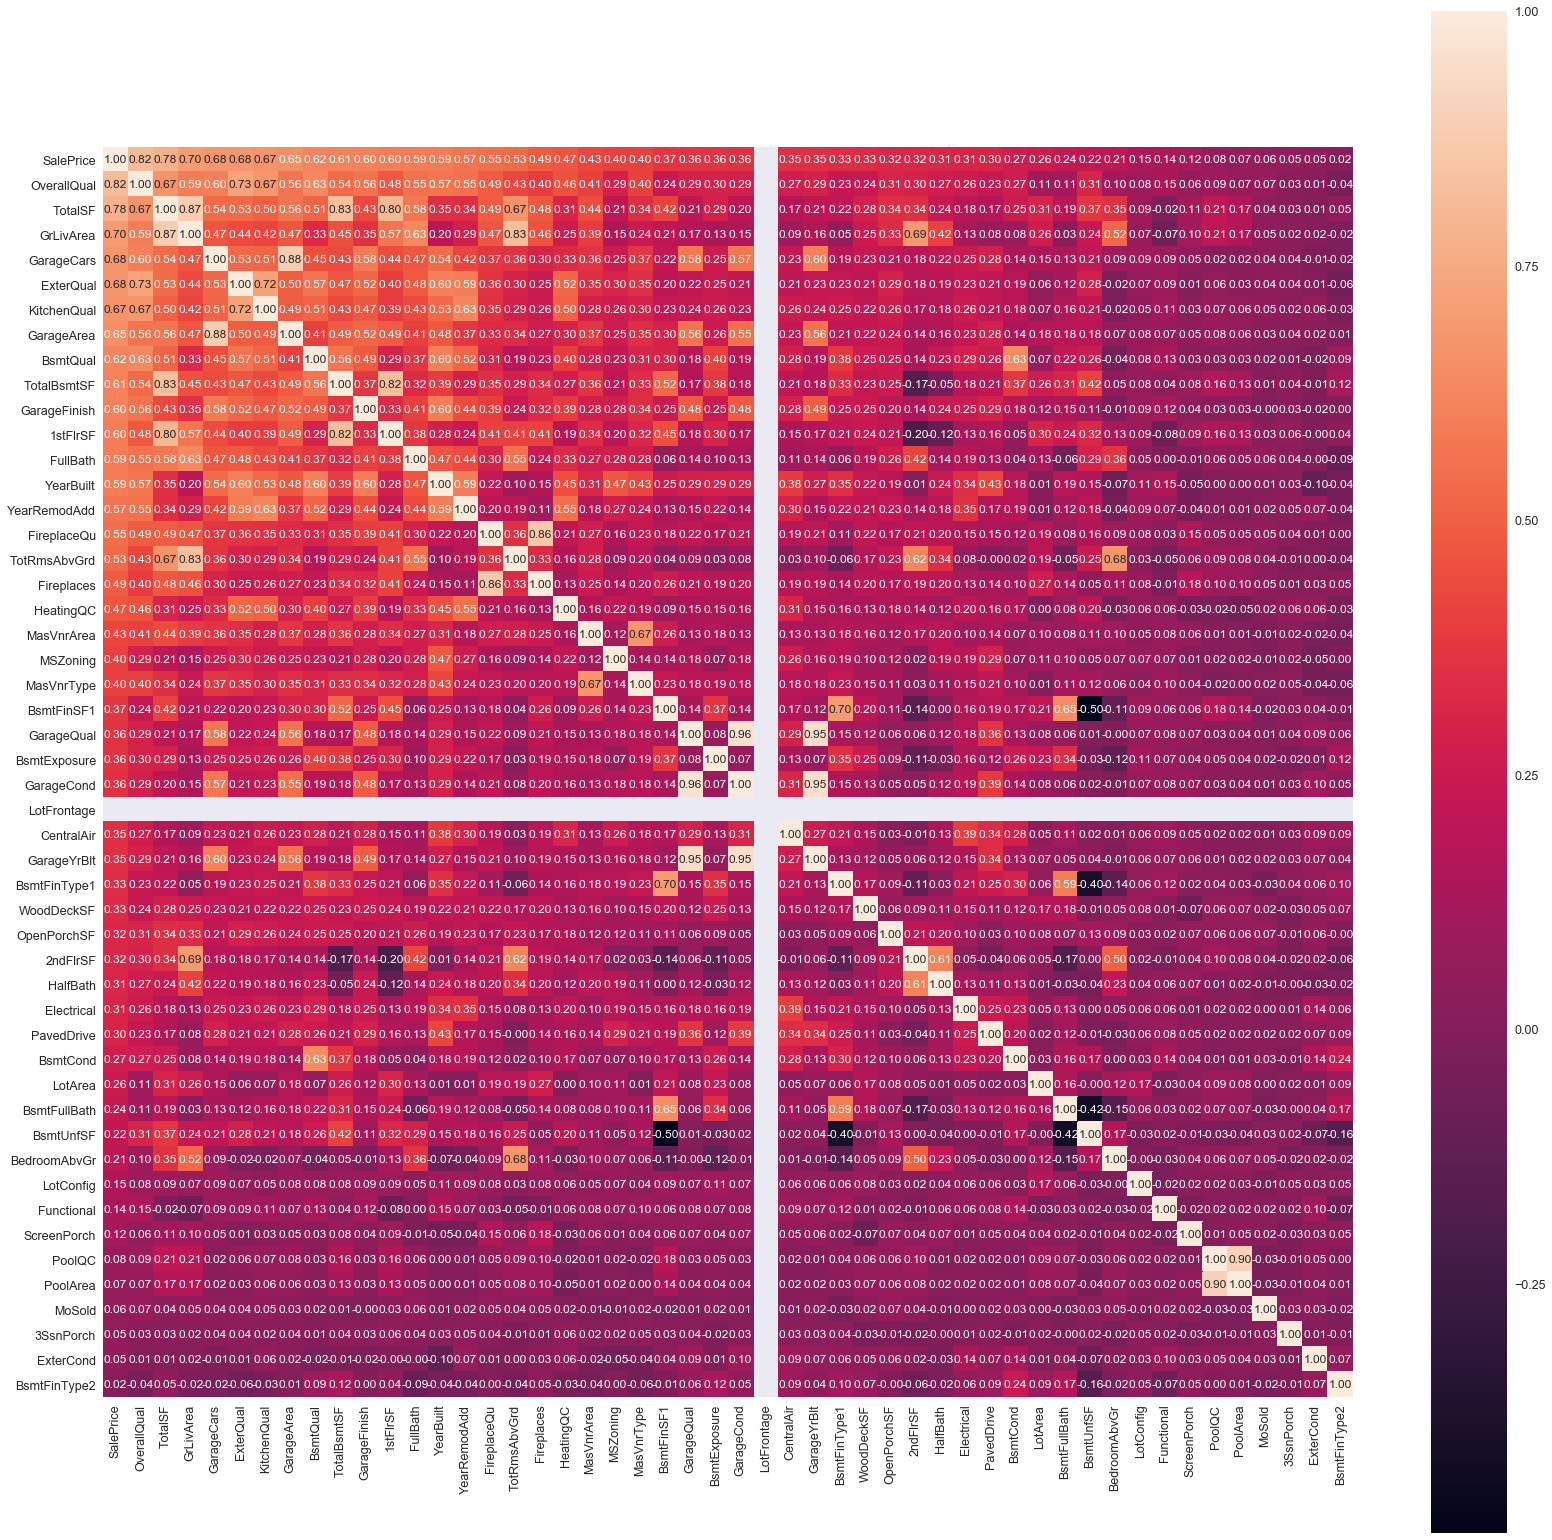

In [290]:
#saleprice correlation matrix
fix, ax = plt.subplots(figsize=(28,28))

corrmat = train_df.corr()
k = 50#number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [291]:
def correlation_rubric(cor_threshold):
#cor_threashold is numeric
#returns features that have a correlation greater than cor_threashold
    colnames = list(corrmat)
    x= []
    for colname in colnames:
        x.append(corrmat.loc[corrmat[colname] > cor_threshold].index.values)
    x_df = pd.DataFrame(x)
    
    x_df['index'] = colnames
    x_df.set_index('index', inplace=True)
    y = []
    for colname in colnames:
        y.append(train_df['SalePrice'].corr(train_df[colname]))
    x_df['SalePrice Correlation'] = y
    return x_df

In [292]:
correlation_rubric(.65)

0             1             2            3  \
index                                                                   
Id                        Id          None          None         None   
MSZoning            MSZoning          None          None         None   
LotFrontage      LotFrontage          None          None         None   
LotArea              LotArea          None          None         None   
LotShape            LotShape          None          None         None   
Utilities          Utilities          None          None         None   
LotConfig          LotConfig          None          None         None   
LandSlope          LandSlope          None          None         None   
OverallQual      OverallQual     ExterQual   KitchenQual    SalePrice   
OverallCond      OverallCond          None          None         None   
YearBuilt          YearBuilt          None          None         None   
YearRemodAdd    YearRemodAdd          None          None         None   
MasVnrType        MasVnrType    MasVnrArea          None         None   
MasVnrArea        MasVnrType    MasVnrArea          None         None   
ExterQual        OverallQual     ExterQual   KitchenQual    SalePrice   
ExterCond          ExterCond          None          None         None   
BsmtQual            BsmtQual          None          None         None   
BsmtCond            BsmtCond          None          None         None   
BsmtExposure    BsmtExposure          None          None         None   
BsmtFinType1    BsmtFinType1    BsmtFinSF1          None         None   
BsmtFinSF1      BsmtFinType1    BsmtFinSF1          None         None   
BsmtFinType2    BsmtFinType2    BsmtFinSF2          None         None   
BsmtFinSF2      BsmtFinType2    BsmtFinSF2          None         None   
BsmtUnfSF          BsmtUnfSF          None          None         None   
TotalBsmtSF      TotalBsmtSF      1stFlrSF       TotalSF         None   
HeatingQC          HeatingQC          None          None         None   
CentralAir        CentralAir          None          None         None   
Electrical        Electrical          None          None         None   
1stFlrSF         TotalBsmtSF      1stFlrSF       TotalSF         None   
2ndFlrSF            2ndFlrSF     GrLivArea          None         None   
...                      ...           ...           ...          ...   
BsmtHalfBath    BsmtHalfBath          None          None         None   
FullBath            FullBath          None          None         None   
HalfBath            HalfBath          None          None         None   
BedroomAbvGr    BedroomAbvGr  TotRmsAbvGrd          None         None   
KitchenAbvGr    KitchenAbvGr          None          None         None   
KitchenQual      OverallQual     ExterQual   KitchenQual    SalePrice   
TotRmsAbvGrd       GrLivArea  BedroomAbvGr  TotRmsAbvGrd      TotalSF   
Functional        Functional          None          None         None   
Fireplaces        Fireplaces   FireplaceQu          None         None   
FireplaceQu       Fireplaces   FireplaceQu          None         None   
GarageYrBlt      GarageYrBlt    GarageQual    GarageCond         None   
GarageFinish    GarageFinish          None          None         None   
GarageCars        GarageCars    GarageArea     SalePrice         None   
GarageArea        GarageCars    GarageArea     SalePrice         None   
GarageQual       GarageYrBlt    GarageQual    GarageCond         None   
GarageCond       GarageYrBlt    GarageQual    GarageCond         None   
PavedDrive        PavedDrive          None          None         None   
WoodDeckSF        WoodDeckSF          None          None         None   
OpenPorchSF      OpenPorchSF          None          None         None   
EnclosedPorch  EnclosedPorch          None          None         None   
3SsnPorch          3SsnPorch          None          None         None   
ScreenPorch      ScreenPorch          None          None         None   
PoolArea    

# skew 2

In [293]:
#creatin a df for normalizing features
train_normalized = train_df

In [294]:
drop_cols = ['Id','Utilities','ExterCond','BsmtFinType1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','Fireplaces','GarageYrBlt','GarageCond','3SsnPorch','PoolQC','MiscVal','MoSold','YrSold','YearBuilt']

In [295]:
train_normalized.drop(drop_cols, axis=1, inplace=True)

In [296]:
train_normalized.shape

(1460, 61)

In [297]:
numeric_feats = train_normalized.dtypes[train_normalized.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_normalized[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
PoolArea       14.813135
LotArea        12.195142
KitchenAbvGr    4.483784
ScreenPorch     4.117977
LotConfig       3.459756
EnclosedPorch   3.086696
MasVnrArea      2.674865
OpenPorchSF     2.361912
LotFrontage     2.160866
TotalSF         1.774874
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
BsmtExposure    1.104465
BsmtUnfSF       0.919323
ExterQual       0.825140
OverallCond     0.692355
TotRmsAbvGrd    0.675646
HalfBath        0.675203
HouseAge        0.612831
BsmtFullBath    0.595454
MasVnrType      0.440444
KitchenQual     0.386368
OverallQual     0.216721
GarageArea      0.179796
SalePrice       0.121222
GarageFinish    0.119744
FireplaceQu     0.112654
FullBath        0.036524
GarageCars     -0.342197
YearRemodAdd   -0.503044
HeatingQC      -0.539902
LotShape       -0.554392
MSZoning       -0.847191
BsmtQual       -1.286247
GarageQual     -3.225265
Electrical     -3.288653
PavedDrive     -3.305538
CentralAir     -3.526757
BsmtCond       -3.697230
LandSlope      -3.971698
Functional     -4.907166

In [88]:
#skewness.to_csv('skewness2.csv')

In [298]:
skewness = skewness[(skewness) > 0.75] # having skewness equal the absolute value since some values 
#are negative and for boxcox the values need to be positive. threshold for skewness is 0.75
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


There are 41 skewed numerical features to Box Cox transform


In [299]:
skewness = skewness.index


In [300]:
skewness=skewness[skewness!='MSSubClass']
skewness=skewness[skewness!='Id']
skewness=skewness[skewness!='LotFrontage']

In [301]:
train_normalized[skewness] = np.log1p(train_normalized[skewness])

In [302]:
train_normalized

MSSubClass  MSZoning  LotFrontage    LotArea Street    Alley  LotShape  \
0            60  1.098612         65.0   9.042040   Pave  NoAlley  0.693147   
1            20  1.098612         80.0   9.169623   Pave  NoAlley  0.693147   
2            60  1.098612         68.0   9.328212   Pave  NoAlley  0.000000   
3            70  1.098612         60.0   9.164401   Pave  NoAlley  0.000000   
4            60  1.098612         84.0   9.565284   Pave  NoAlley  0.000000   
5            50  1.098612         85.0   9.555064   Pave  NoAlley  0.000000   
6            20  1.098612         75.0   9.218804   Pave  NoAlley  0.693147   
7            60  1.098612          NaN   9.247925   Pave  NoAlley  0.000000   
8            50  0.693147         51.0   8.719481   Pave  NoAlley  0.693147   
9           190  1.098612         50.0   8.912069   Pave  NoAlley  0.693147   
10           20  1.098612         70.0   9.323758   Pave  NoAlley  0.693147   
11           60  1.098612         85.0   9.386392   Pave  NoAlley  0.000000   
12           20  1.098612          NaN   9.470317   Pave  NoAlley  0.000000   
13           20  1.098612         91.0   9.273597   Pave  NoAlley  0.000000   
14           20  1.098612          NaN   9.298443   Pave  NoAlley  0.000000   
15           45  0.693147         51.0   8.719481   Pave  NoAlley  0.693147   
16           20  1.098612          NaN   9.327412   Pave  NoAlley  0.000000   
17           90  1.098612         72.0   9.286560   Pave  NoAlley  0.693147   
18           20  1.098612         66.0   9.524859   Pave  NoAlley  0.693147   
19           20  1.098612         70.0   8.930759   Pave  NoAlley  0.693147   
20           60  1.098612        101.0   9.562123   Pave  NoAlley  0.000000   
21           45  0.693147         57.0   8.915969   Pave     Grvl  0.693147   
22           20  1.098612         75.0   9.184304   Pave  NoAlley  0.693147   
23          120  0.693147         44.0   8.348775   Pave  NoAlley  0.693147   
24           20  1.098612          NaN   9.017605   Pave  NoAlley  0.000000   
25           20  1.098612        110.0   9.563178   Pave  NoAlley  0.693147   
26           20  1.098612         60.0   8.881975   Pave  NoAlley  0.693147   
27           20  1.098612         98.0   9.348275   Pave  NoAlley  0.693147   
28           20  1.098612         47.0   9.700269   Pave  NoAlley  0.000000   
29           30  0.693147         60.0   8.752265   Pave  NoAlley  0.000000   
...         ...       ...          ...        ...    ...      ...       ...   
1430         60  1.098612         60.0   9.995656   Pave  NoAlley  0.000000   
1431        120  1.098612          NaN   8.502891   Pave  NoAlley  0.000000   
1432         30  1.098612         60.0   9.287394   Pave     Grvl  0.693147   
1433         60  1.098612         93.0   9.236203   Pave  NoAlley  0.000000   
1434         20  1.098612         80.0   9.764283   Pave  NoAlley  0.693147   
1435         20  1.098612         80.0   9.036106   Pave  NoAlley  0.693147   
1436         20  1.098612         60.0   9.105091   Pave  NoAlley  0.693147   
1437         20  1.098612         96.0   9.429074   Pave  NoAlley  0.693147   
1438         20  0.693147         90.0   8.910316   Pave  NoAlley  0.693147   
1439         60  1.098612         80.0   9.357466   Pave  NoAlley  0.693147   
1440         70  1.098612         79.0   9.352447   Pave  NoAlley  0.000000   
1441        120  0.693147          NaN   8.395477   Pave  NoAlley  0.693147   
1442         60  1.386294         85.0   9.306014   Pave  NoAlley  0.693147   
1443         30  1.098612          NaN   9.088738   Pave  NoAlley  0.693147   
1444         20  1.098612         63.0   9.047939   Pave  NoAlley  0.693147   
1445         85  1.098612         70.0   9.036106   Pave  NoAlley  0.693147   
1446         20  1.098612          NaN  10.171337   Pave  NoAlley  0.000000   
1447         60  1.098612         80.0   9.210440   Pave  NoAlley  0.693147   
1448         50  1.098612         70.0   9.373139   Pav

# Dummifying Categorical Data

In [303]:
train_normalized_dummies = train_normalized.copy()

In [306]:
train_normalized_dummies=pd.get_dummies(train_normalized_dummies, prefix = None, prefix_sep='_', dummy_na = False, columns=['MSSubClass','Street','Alley','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','Fence','MiscFeature','SaleType','SaleCondition'],sparse = False, drop_first=True)



In [307]:
#shape of DF after dummifying 
train_normalized_dummies.shape

(1460, 189)

In [97]:
pd.DataFrame(train_normalized_dummies.dtypes).loc['MasVnrType']

0    float64
Name: MasVnrType, dtype: object

In [308]:
train_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612         65.0   9.042040  0.693147   0.000000   0.693147   
1     1.098612         80.0   9.169623  0.693147   0.000000   0.693147   
2     1.098612         68.0   9.328212  0.000000   0.000000   0.693147   
3     1.098612         60.0   9.164401  0.000000   0.000000   0.693147   
4     1.098612         84.0   9.565284  0.000000   0.000000   0.693147   
5     1.098612         85.0   9.555064  0.000000   0.000000   0.693147   
6     1.098612         75.0   9.218804  0.693147   0.000000   0.693147   
7     1.098612          NaN   9.247925  0.000000   0.000000   0.693147   
8     0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
9     1.098612         50.0   8.912069  0.693147   0.000000   0.693147   
10    1.098612         70.0   9.323758  0.693147   0.000000   0.693147   
11    1.098612         85.0   9.386392  0.000000   0.000000   0.693147   
12    1.098612          NaN   9.470317  0.000000   0.000000   0.693147   
13    1.098612         91.0   9.273597  0.000000   0.000000   0.693147   
14    1.098612          NaN   9.298443  0.000000   0.000000   0.693147   
15    0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
16    1.098612          NaN   9.327412  0.000000   0.693147   0.693147   
17    1.098612         72.0   9.286560  0.693147   0.000000   0.693147   
18    1.098612         66.0   9.524859  0.693147   0.000000   0.693147   
19    1.098612         70.0   8.930759  0.693147   0.000000   0.693147   
20    1.098612        101.0   9.562123  0.000000   0.000000   0.693147   
21    0.693147         57.0   8.915969  0.693147   0.000000   0.693147   
22    1.098612         75.0   9.184304  0.693147   0.000000   0.693147   
23    0.693147         44.0   8.348775  0.693147   0.000000   0.693147   
24    1.098612          NaN   9.017605  0.000000   0.000000   0.693147   
25    1.098612        110.0   9.563178  0.693147   0.000000   0.693147   
26    1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
27    1.098612         98.0   9.348275  0.693147   0.000000   0.693147   
28    1.098612         47.0   9.700269  0.000000   0.693147   0.693147   
29    0.693147         60.0   8.752265  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612         60.0   9.995656  0.000000   0.000000   0.693147   
1431  1.098612          NaN   8.502891  0.000000   0.000000   0.693147   
1432  1.098612         60.0   9.287394  0.693147   0.000000   0.693147   
1433  1.098612         93.0   9.236203  0.000000   0.000000   0.693147   
1434  1.098612         80.0   9.764283  0.693147   0.000000   0.000000   
1435  1.098612         80.0   9.036106  0.693147   0.000000   0.693147   
1436  1.098612         60.0   9.105091  0.693147   0.000000   0.693147   
1437  1.098612         96.0   9.429074  0.693147   0.000000   0.693147   
1438  0.693147         90.0   8.910316  0.693147   0.000000   0.693147   
1439  1.098612         80.0   9.357466  0.693147   0.000000   0.693147   
1440  1.098612         79.0   9.352447  0.000000   0.000000   0.000000   
1441  0.693147          NaN   8.395477  0.693147   0.000000   0.693147   
1442  1.386294         85.0   9.306014  0.693147   0.000000   0.693147   
1443  1.098612          NaN   9.088738  0.693147   0.000000   0.693147   
1444  1.098612         63.0   9.047939  0.693147   0.000000   0.693147   
1445  1.098612         70.0   9.036106  0.693147   0.000000   0.693147   
1446  1.098612          NaN  10.171337  0.000000   0.693147   0.693147   
1447  1.098612         80.0   9.210440  0.693147   0.000000   0.693147   
1448  1.098612         70.0   9.373139  0.693147   0.000000   0.693147   
1449  0.693147         21.0   7.335634  0.693147   0.000000   0.693147   
1450  1.098612         60.0   9.105091  0.693147   0.000000   0.693147   
1451  1.098612         78.0   9.133783  0.693147   0.000000   0.693147   
1452  0.69

# kNN for missing values - move this to before skewness 


In [309]:
test_knn_LotFrontage = train_normalized_dummies[train_normalized_dummies.LotFrontage.isnull()] #where LotFrontage is NA
test_knn_LotFrontage

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
7     1.098612          NaN   9.247925  0.000000   0.000000   0.693147   
12    1.098612          NaN   9.470317  0.000000   0.000000   0.693147   
14    1.098612          NaN   9.298443  0.000000   0.000000   0.693147   
16    1.098612          NaN   9.327412  0.000000   0.693147   0.693147   
24    1.098612          NaN   9.017605  0.000000   0.000000   0.693147   
31    1.098612          NaN   9.053102  0.000000   0.693147   0.693147   
42    1.098612          NaN   9.124891  0.000000   0.693147   0.693147   
43    1.098612          NaN   9.127067  0.000000   0.693147   0.693147   
50    1.098612          NaN   9.537484  0.000000   0.000000   0.693147   
64    1.098612          NaN   9.145909  0.693147   0.000000   0.693147   
66    1.098612          NaN   9.898525  0.693147   0.000000   0.693147   
76    1.098612          NaN   9.044994  0.000000   0.000000   0.693147   
84    1.098612          NaN   9.051462  0.000000   0.000000   0.693147   
95    1.098612          NaN   9.186662  0.000000   0.000000   0.693147   
100   1.098612          NaN   9.268987  0.000000   0.000000   0.693147   
104   0.693147          NaN   8.956609  0.693147   0.000000   0.693147   
111   1.098612          NaN   8.955577  0.000000   0.000000   0.693147   
113   1.098612          NaN   9.952325  0.693147   0.000000   0.693147   
116   1.098612          NaN   9.360225  0.693147   0.000000   0.693147   
120   1.098612          NaN   9.973666  0.000000   0.693147   0.000000   
126   1.098612          NaN   8.502891  0.000000   0.000000   0.693147   
131   1.098612          NaN   9.411238  0.000000   0.000000   0.693147   
133   1.098612          NaN   8.832588  0.000000   0.000000   0.693147   
136   1.098612          NaN   9.245321  0.000000   0.000000   0.693147   
147   1.098612          NaN   9.159678  0.000000   0.693147   0.693147   
149   0.693147          NaN   8.738896  0.693147   0.000000   0.693147   
152   1.098612          NaN   9.602653  0.000000   0.693147   0.693147   
153   1.098612          NaN   9.510519  0.693147   0.000000   0.693147   
160   1.098612          NaN   9.316590  0.000000   0.693147   0.693147   
166   1.098612          NaN   9.278840  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1300  1.098612          NaN   9.283870  0.000000   0.693147   0.693147   
1301  1.098612          NaN   8.922792  0.000000   0.000000   0.693147   
1309  1.098612          NaN   8.875427  0.693147   0.000000   0.693147   
1312  1.098612          NaN   9.166702  0.000000   0.000000   0.693147   
1318  1.098612          NaN   9.601166  0.000000   0.693147   0.693147   
1321  1.098612          NaN   8.799058  0.000000   0.000000   0.693147   
1342  1.098612          NaN   9.145909  0.693147   0.000000   0.693147   
1346  1.098612          NaN   9.941843  0.000000   0.693147   0.693147   
1348  1.098612          NaN   9.692581  0.000000   0.000000   0.693147   
1354  1.098612          NaN   9.241548  0.000000   0.000000   0.693147   
1356  1.098612          NaN   9.156729  0.693147   0.000000   0.693147   
1357  1.098612          NaN   9.436519  0.000000   0.693147   0.693147   
1358  1.386294          NaN   7.658228  0.693147   0.000000   0.693147   
1362  1.098612          NaN   9.434603  0.000000   0.000000   0.693147   
1365  1.386294          NaN   8.922792  0.693147   0.000000   0.693147   
1368  0.693147          NaN   8.397508  0.693147   0.000000   0.693147   
1373  1.098612          NaN   9.341456  0.693147   0.000000   0.693147   
1381  1.098612          NaN   9.466996  0.000000   0.000000   0.693147   
1383  1.098612          NaN  10.140139  0.693147   0.000000   0.693147   
1396  1.098612          NaN  10.954327  0.000000   0.000000   0.000000   
1407  1.098612          NaN   9.080346  0.000000   0.000000   0.693147   
1417  1.098612          NaN   9.713900  0.000000   0.000000   0.693147   
1419  1.09

In [310]:
#kNN for LotFrontage
train_knn_LotFrontage = train_normalized_dummies[-train_normalized_dummies.LotFrontage.isnull()]
train_knn_LotFrontage



MSZoning  LotFrontage   LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612         65.0  9.042040  0.693147   0.000000   0.693147   
1     1.098612         80.0  9.169623  0.693147   0.000000   0.693147   
2     1.098612         68.0  9.328212  0.000000   0.000000   0.693147   
3     1.098612         60.0  9.164401  0.000000   0.000000   0.693147   
4     1.098612         84.0  9.565284  0.000000   0.000000   0.693147   
5     1.098612         85.0  9.555064  0.000000   0.000000   0.693147   
6     1.098612         75.0  9.218804  0.693147   0.000000   0.693147   
8     0.693147         51.0  8.719481  0.693147   0.000000   0.693147   
9     1.098612         50.0  8.912069  0.693147   0.000000   0.693147   
10    1.098612         70.0  9.323758  0.693147   0.000000   0.693147   
11    1.098612         85.0  9.386392  0.000000   0.000000   0.693147   
13    1.098612         91.0  9.273597  0.000000   0.000000   0.693147   
15    0.693147         51.0  8.719481  0.693147   0.000000   0.693147   
17    1.098612         72.0  9.286560  0.693147   0.000000   0.693147   
18    1.098612         66.0  9.524859  0.693147   0.000000   0.693147   
19    1.098612         70.0  8.930759  0.693147   0.000000   0.693147   
20    1.098612        101.0  9.562123  0.000000   0.000000   0.693147   
21    0.693147         57.0  8.915969  0.693147   0.000000   0.693147   
22    1.098612         75.0  9.184304  0.693147   0.000000   0.693147   
23    0.693147         44.0  8.348775  0.693147   0.000000   0.693147   
25    1.098612        110.0  9.563178  0.693147   0.000000   0.693147   
26    1.098612         60.0  8.881975  0.693147   0.000000   0.693147   
27    1.098612         98.0  9.348275  0.693147   0.000000   0.693147   
28    1.098612         47.0  9.700269  0.000000   0.693147   0.693147   
29    0.693147         60.0  8.752265  0.000000   0.000000   0.693147   
30    0.000000         50.0  9.047939  0.693147   0.000000   0.693147   
32    1.098612         85.0  9.310186  0.693147   0.000000   0.693147   
33    1.098612         70.0  9.264165  0.000000   0.000000   0.693147   
34    1.098612         60.0  8.897546  0.693147   0.000000   0.693147   
35    1.098612        108.0  9.504427  0.693147   0.000000   0.693147   
...        ...          ...       ...       ...        ...        ...   
1425  1.098612         80.0  9.280053  0.000000   0.000000   0.693147   
1426  1.098612         81.0  9.300638  0.000000   0.000000   0.693147   
1427  1.098612         60.0  9.299358  0.693147   0.000000   0.693147   
1428  0.693147         60.0  8.881975  0.693147   0.000000   0.693147   
1430  1.098612         60.0  9.995656  0.000000   0.000000   0.693147   
1432  1.098612         60.0  9.287394  0.693147   0.000000   0.693147   
1433  1.098612         93.0  9.236203  0.000000   0.000000   0.693147   
1434  1.098612         80.0  9.764283  0.693147   0.000000   0.000000   
1435  1.098612         80.0  9.036106  0.693147   0.000000   0.693147   
1436  1.098612         60.0  9.105091  0.693147   0.000000   0.693147   
1437  1.098612         96.0  9.429074  0.693147   0.000000   0.693147   
1438  0.693147         90.0  8.910316  0.693147   0.000000   0.693147   
1439  1.098612         80.0  9.357466  0.693147   0.000000   0.693147   
1440  1.098612         79.0  9.352447  0.000000   0.000000   0.000000   
1442  1.386294         85.0  9.306014  0.693147   0.000000   0.693147   
1444  1.098612         63.0  9.047939  0.693147   0.000000   0.693147   
1445  1.098612         70.0  9.036106  0.693147   0.000000   0.693147   
1447  1.098612         80.0  9.210440  0.693147   0.000000   0.693147   
1448  1.098612         70.0  9.373139  0.693147   0.000000   0.693147   
1449  0.693147         21.0  7.335634  0.693147   0.000000   0.693147   
1450  1.098612         60.0  9.105091  0.693147   0.000000   0.693147   
1451  1.098612         78.0  9.133783  0.693147   0.000000   0.693147   
1452  0.693147         35.0  8.209580  0.693147   0.000000   0.6

In [311]:
y_col_for_knn=['LotFrontage']

In [312]:
train_knn_LotFrontage[y_col_for_knn]

LotFrontage
0            65.0
1            80.0
2            68.0
3            60.0
4            84.0
5            85.0
6            75.0
8            51.0
9            50.0
10           70.0
11           85.0
13           91.0
15           51.0
17           72.0
18           66.0
19           70.0
20          101.0
21           57.0
22           75.0
23           44.0
25          110.0
26           60.0
27           98.0
28           47.0
29           60.0
30           50.0
32           85.0
33           70.0
34           60.0
35          108.0
...           ...
1425         80.0
1426         81.0
1427         60.0
1428         60.0
1430         60.0
1432         60.0
1433         93.0
1434         80.0
1435         80.0
1436         60.0
1437         96.0
1438         90.0
1439         80.0
1440         79.0
1442         85.0
1444         63.0
1445         70.0
1447         80.0
1448         70.0
1449         21.0
1450         60.0
1451         78.0
1452         35.0
1453         90.0
1454         62.0
1455         62.0
1456         85.0
1457         66.0
1458         68.0
1459         75.0

[1201 rows x 1 columns]

In [313]:
test_knn_LotFrontage[y_col_for_knn]

LotFrontage
7             NaN
12            NaN
14            NaN
16            NaN
24            NaN
31            NaN
42            NaN
43            NaN
50            NaN
64            NaN
66            NaN
76            NaN
84            NaN
95            NaN
100           NaN
104           NaN
111           NaN
113           NaN
116           NaN
120           NaN
126           NaN
131           NaN
133           NaN
136           NaN
147           NaN
149           NaN
152           NaN
153           NaN
160           NaN
166           NaN
...           ...
1300          NaN
1301          NaN
1309          NaN
1312          NaN
1318          NaN
1321          NaN
1342          NaN
1346          NaN
1348          NaN
1354          NaN
1356          NaN
1357          NaN
1358          NaN
1362          NaN
1365          NaN
1368          NaN
1373          NaN
1381          NaN
1383          NaN
1396          NaN
1407          NaN
1417          NaN
1419          NaN
1423          NaN
1424          NaN
1429          NaN
1431          NaN
1441          NaN
1443          NaN
1446          NaN

[259 rows x 1 columns]

In [329]:
x_col_knn = list(train_normalized_dummies.columns[train_normalized_dummies.dtypes != "object"])
x_col_knn

['MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'TotalSF',
 'HouseAge',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste',
 '

In [328]:
x_col_knn

['LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'TotalSF',
 'HouseAge',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neigh

In [330]:
#excluding MsnVnrArea for now as it has NAs
#x_col_knn = x_col_knn[3:8] + x_col_knn[9:]
x_col_knn = x_col_knn[0:1] +  x_col_knn[2:]
len(x_col_knn)
x_col_knn

['MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'TotalSF',
 'HouseAge',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste',
 'Neighborhood_BrD

In [331]:
#creating train test split 
y=train_knn_LotFrontage["LotFrontage"]
X_train, X_test, y_train, y_test = train_test_split(train_knn_LotFrontage, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(960, 189) (960,)
(241, 189) (241,)


In [117]:
X_train

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
892   1.098612         70.0   9.037771  0.693147   0.000000   0.693147   
565   1.098612         66.0   8.833317  0.693147   0.000000   0.693147   
532   1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
735   0.693147         60.0   9.287394  0.693147   0.000000   0.693147   
596   0.693147         60.0   8.188967  0.693147   0.000000   0.693147   
413   0.693147         56.0   9.100637  0.693147   0.000000   0.693147   
523   1.098612        130.0  10.599007  0.000000   0.000000   0.693147   
607   1.098612         78.0   8.962007  0.693147   0.000000   0.000000   
123   1.098612         55.0   8.973732  0.693147   0.000000   0.693147   
1207  1.098612         70.0   9.119978  0.693147   0.000000   0.693147   
866   1.098612         67.0   9.273972  0.000000   0.000000   0.693147   
894   1.098612         64.0   8.856376  0.693147   0.000000   0.693147   
19    1.098612         70.0   8.930759  0.693147   0.000000   0.693147   
377   1.386294        102.0   9.318657  0.000000   0.000000   0.693147   
1279  0.000000         60.0   8.922792  0.693147   0.000000   0.693147   
1397  0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
146   0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
820   1.098612         72.0   8.885579  0.000000   0.693147   0.693147   
1106  1.098612        114.0   9.245514  0.000000   0.000000   0.693147   
1412  1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
1142  1.098612         77.0   9.206935  0.693147   0.000000   0.693147   
860   1.098612         55.0   8.941545  0.693147   0.000000   0.693147   
1231  1.098612         70.0   8.952735  0.693147   0.000000   0.693147   
322   1.098612         86.0   9.247732  0.000000   0.000000   0.693147   
1285  0.693147         50.0   8.699681  0.693147   0.000000   0.693147   
492   1.098612        105.0   9.653679  0.000000   0.000000   0.693147   
571   1.098612         60.0   8.900140  0.693147   0.000000   0.693147   
115   1.386294         34.0   8.080547  0.693147   0.000000   0.693147   
694   0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
909   1.098612        149.0   9.440658  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1102  1.098612         70.0   8.853808  0.693147   0.000000   0.693147   
1425  1.098612         80.0   9.280053  0.000000   0.000000   0.693147   
793   1.098612         76.0   9.122492  0.693147   0.000000   0.693147   
963   1.098612        122.0   9.386308  0.000000   0.000000   0.693147   
1435  1.098612         80.0   9.036106  0.693147   0.000000   0.693147   
118   1.098612         90.0   9.423595  0.693147   0.000000   0.693147   
1028  1.098612         79.0   9.158310  0.693147   0.000000   0.693147   
542   1.098612         78.0   9.224342  0.693147   0.000000   0.693147   
910   1.098612         80.0   9.358847  0.693147   0.000000   0.693147   
1184  1.098612         50.0  10.466925  0.693147   0.000000   0.000000   
139   1.098612         65.0   9.643875  0.000000   0.000000   0.693147   
938   1.098612         73.0   9.078065  0.693147   0.000000   0.693147   
85    1.098612        121.0   9.684087  0.693147   0.000000   0.693147   
1022  0.693147         52.0   9.152711  0.693147   0.000000   0.693147   
646   1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
1027  1.098612         71.0   9.161255  0.000000   0.000000   0.693147   
213   1.098612         43.0   9.515543  0.000000   0.693147   0.693147   
102   1.098612         64.0   8.856376  0.693147   0.000000   0.693147   
661   1.098612         52.0  10.749141  0.000000   0.693147   0.693147   
847   1.098612         36.0   9.650142  0.000000   0.693147   0.693147   
383   0.693147         60.0   9.105091  0.693147   0.000000   0.693147   
723   1.098612         60.0   9.008591  0.693147   0.000000   0.693147   
1329  1.09

In [332]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1, 60)

# list of scores from k_range
k_scores = []

X=train_knn_LotFrontage[x_col_knn]
y=train_knn_LotFrontage[y_col_for_knn]
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(max(k_scores))




#x_columns=list(train_knn.columns[train_knn.dtypes != 'object'])
# The columns that we will be making predictions with.
#x_columns = x_columns[2:] 
#y_column = ["LotFrontage"]

#from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
#knn = KNeighborsRegressor(n_neighbors=30) #14 is best so far with lowest MSE at 
# Fit the model on the training data.
#knn.fit(X_train[x_columns], y_train)
# Make point predictions on the test set using the fit model.

#predictions = knn.predict(X_test[x_columns])

-451.977306612


In [333]:
k_scores

[-595.21503443526171,
 -489.49403064738289,
 -463.53655111723293,
 -454.11526816460054,
 -451.97730661157021,
 -452.94051040710127,
 -452.43819221903641,
 -454.78044077134984,
 -460.20848382818076,
 -464.24686790633615,
 -467.42388725724567,
 -468.35263410621366,
 -468.09897101732759,
 -468.80770485466917,
 -468.99777089072529,
 -471.4822019466684,
 -472.70770565834493,
 -476.22960575876613,
 -481.95264266309522,
 -482.69865635330569,
 -483.60252469031684,
 -485.57848153302376,
 -488.80943772229949,
 -490.32382896196822,
 -491.29901706887057,
 -492.13077280673872,
 -491.75063106750258,
 -492.98217855737346,
 -495.43580794705241,
 -497.45889419957149,
 -499.77034596509037,
 -500.75854095374916,
 -502.45696205733776,
 -504.44889714223081,
 -505.60157547647157,
 -505.66562428259869,
 -506.61486543333592,
 -508.05152242012161,
 -507.46003429942249,
 -508.14978233471066,
 -509.20324416218864,
 -508.51662034304081,
 -510.30459448335557,
 -510.79188803773076,
 -512.04923434683542,
 -513.98235

Text(0,0.5,'neg_mean_squared_error')

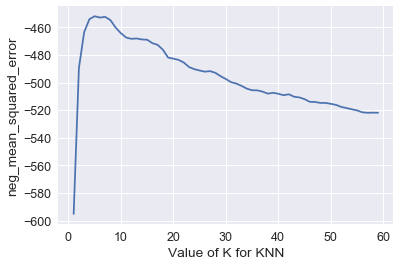

In [335]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('neg_mean_squared_error')

In [336]:
import random
random.seed(0)
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train[x_col_knn], y_train)
predictions = knn.predict(X_test[x_col_knn])

predictions

array([  67. ,   65.2,   52. ,   78.2,   79.6,   71. ,   71. ,   54.8,
         51.8,   72.6,   53.4,   55.4,   66.4,   81.6,   72. ,   63.2,
         31.8,   67.4,   55.6,   79.4,   76.2,   83.2,   71. ,   39.8,
         85.8,   77. ,   63.4,   68.8,   49. ,   65.4,   66.6,   81.8,
         61. ,   62.4,   64.4,   73.2,   66.6,   93.2,   73.2,   81.8,
         82. ,   88.8,   70.2,   64.2,   56. ,   49.6,   72.6,   86.6,
         83.6,   31.8,   84.2,   53.2,   80.6,   84.2,   55.4,   58.8,
         72.2,   47.8,   85.4,   80.6,   64.2,   55. ,   73.6,   57.4,
         89.4,   73.4,   72.2,   82.4,   67.6,   90.2,   65. ,   71. ,
         77.8,   70. ,   74.4,   70.6,   58.6,   59. ,   63.4,   44.8,
         74.2,   57.4,   83.4,   82.6,   82.8,   74. ,   55.4,   93.4,
         77.6,   79.2,   83.8,   60.8,   77.8,   79.8,   73.6,   74.4,
         73.8,   84.2,   55. ,   67.6,   85. ,   73. ,   47. ,   45. ,
         72.4,   49.6,   73. ,   53.4,   75.2,   69. ,   57.8,   67.4,
      

In [337]:
actual = y_test
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
mse

331.06207468879666

In [338]:
x_col_knn

['MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'TotalSF',
 'HouseAge',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste',
 'Neighborhood_BrD

In [339]:
predictions_lotfrontage = knn.predict(test_knn_LotFrontage[x_col_knn])
train_normalized_dummies.loc[train_normalized_dummies["LotFrontage"].isnull(),"LotFrontage"] = predictions_lotfrontage



In [ ]:

#sum((train_normalized_dummiestrain_norm ["LotFrontage"].isna())

In [ ]:
#prediction2 = knn.predict(test_knn[x_columns])  #running on our test set 
#prediction2

In [ ]:
#train_df.loc[train_df['LotFrontage'].isnull(),'LotFrontage'] = prediction2 #adding back our knn values into our dataset

In [ ]:
#actual = y_test
#mse = (((predictions - actual) ** 2).sum()) / len(predictions)
#mse

#previously was doing kNN before dummifying which gave an MSE around 218. now giving MSE of .075

In [ ]:
#test gridsearch

# Trying out Lasso for feature selection

In [340]:
train_normalized_dummies.loc[:,train_normalized_dummies.columns != 'SalePrice']

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612         65.0   9.042040  0.693147   0.000000   0.693147   
1     1.098612         80.0   9.169623  0.693147   0.000000   0.693147   
2     1.098612         68.0   9.328212  0.000000   0.000000   0.693147   
3     1.098612         60.0   9.164401  0.000000   0.000000   0.693147   
4     1.098612         84.0   9.565284  0.000000   0.000000   0.693147   
5     1.098612         85.0   9.555064  0.000000   0.000000   0.693147   
6     1.098612         75.0   9.218804  0.693147   0.000000   0.693147   
7     1.098612         78.8   9.247925  0.000000   0.000000   0.693147   
8     0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
9     1.098612         50.0   8.912069  0.693147   0.000000   0.693147   
10    1.098612         70.0   9.323758  0.693147   0.000000   0.693147   
11    1.098612         85.0   9.386392  0.000000   0.000000   0.693147   
12    1.098612         67.0   9.470317  0.000000   0.000000   0.693147   
13    1.098612         91.0   9.273597  0.000000   0.000000   0.693147   
14    1.098612         97.8   9.298443  0.000000   0.000000   0.693147   
15    0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
16    1.098612         96.0   9.327412  0.000000   0.693147   0.693147   
17    1.098612         72.0   9.286560  0.693147   0.000000   0.693147   
18    1.098612         66.0   9.524859  0.693147   0.000000   0.693147   
19    1.098612         70.0   8.930759  0.693147   0.000000   0.693147   
20    1.098612        101.0   9.562123  0.000000   0.000000   0.693147   
21    0.693147         57.0   8.915969  0.693147   0.000000   0.693147   
22    1.098612         75.0   9.184304  0.693147   0.000000   0.693147   
23    0.693147         44.0   8.348775  0.693147   0.000000   0.693147   
24    1.098612         66.6   9.017605  0.000000   0.000000   0.693147   
25    1.098612        110.0   9.563178  0.693147   0.000000   0.693147   
26    1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
27    1.098612         98.0   9.348275  0.693147   0.000000   0.693147   
28    1.098612         47.0   9.700269  0.000000   0.693147   0.693147   
29    0.693147         60.0   8.752265  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612         60.0   9.995656  0.000000   0.000000   0.693147   
1431  1.098612         56.0   8.502891  0.000000   0.000000   0.693147   
1432  1.098612         60.0   9.287394  0.693147   0.000000   0.693147   
1433  1.098612         93.0   9.236203  0.000000   0.000000   0.693147   
1434  1.098612         80.0   9.764283  0.693147   0.000000   0.000000   
1435  1.098612         80.0   9.036106  0.693147   0.000000   0.693147   
1436  1.098612         60.0   9.105091  0.693147   0.000000   0.693147   
1437  1.098612         96.0   9.429074  0.693147   0.000000   0.693147   
1438  0.693147         90.0   8.910316  0.693147   0.000000   0.693147   
1439  1.098612         80.0   9.357466  0.693147   0.000000   0.693147   
1440  1.098612         79.0   9.352447  0.000000   0.000000   0.000000   
1441  0.693147         46.6   8.395477  0.693147   0.000000   0.693147   
1442  1.386294         85.0   9.306014  0.693147   0.000000   0.693147   
1443  1.098612         73.0   9.088738  0.693147   0.000000   0.693147   
1444  1.098612         63.0   9.047939  0.693147   0.000000   0.693147   
1445  1.098612         70.0   9.036106  0.693147   0.000000   0.693147   
1446  1.098612         67.4  10.171337  0.000000   0.693147   0.693147   
1447  1.098612         80.0   9.210440  0.693147   0.000000   0.693147   
1448  1.098612         70.0   9.373139  0.693147   0.000000   0.693147   
1449  0.693147         21.0   7.335634  0.693147   0.000000   0.693147   
1450  1.098612         60.0   9.105091  0.693147   0.000000   0.693147   
1451  1.098612         78.0   9.133783  0.693147   0.000000   0.693147   
1452  0.69

In [341]:
x = np.array(train_normalized_dummies.loc[:,train_normalized_dummies.columns != 'SalePrice'])
y = np.array(train_normalized_dummies.SalePrice)

In [342]:
lasso = linear_model.Lasso(alpha=1) # create a lasso instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([ 0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,
        -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,
         0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
         0., -0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0.,
        -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
         0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,
        -0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
         0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
        -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.

In [343]:
alphas_lasso = np.logspace(-5, 1, 100) #creating a list of alpha 
coef_lasso = []

In [344]:
for i in alphas_lasso: #Write a for loop to train an lasso regression for each α in the alphas_lasso. Collect the resulted coefficients into coef_lasso
    lasso.set_params(alpha=i).fit(x, y)
    coef_lasso.append(lasso.coef_)
    
    

In [345]:
train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice']


Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrType',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=188)

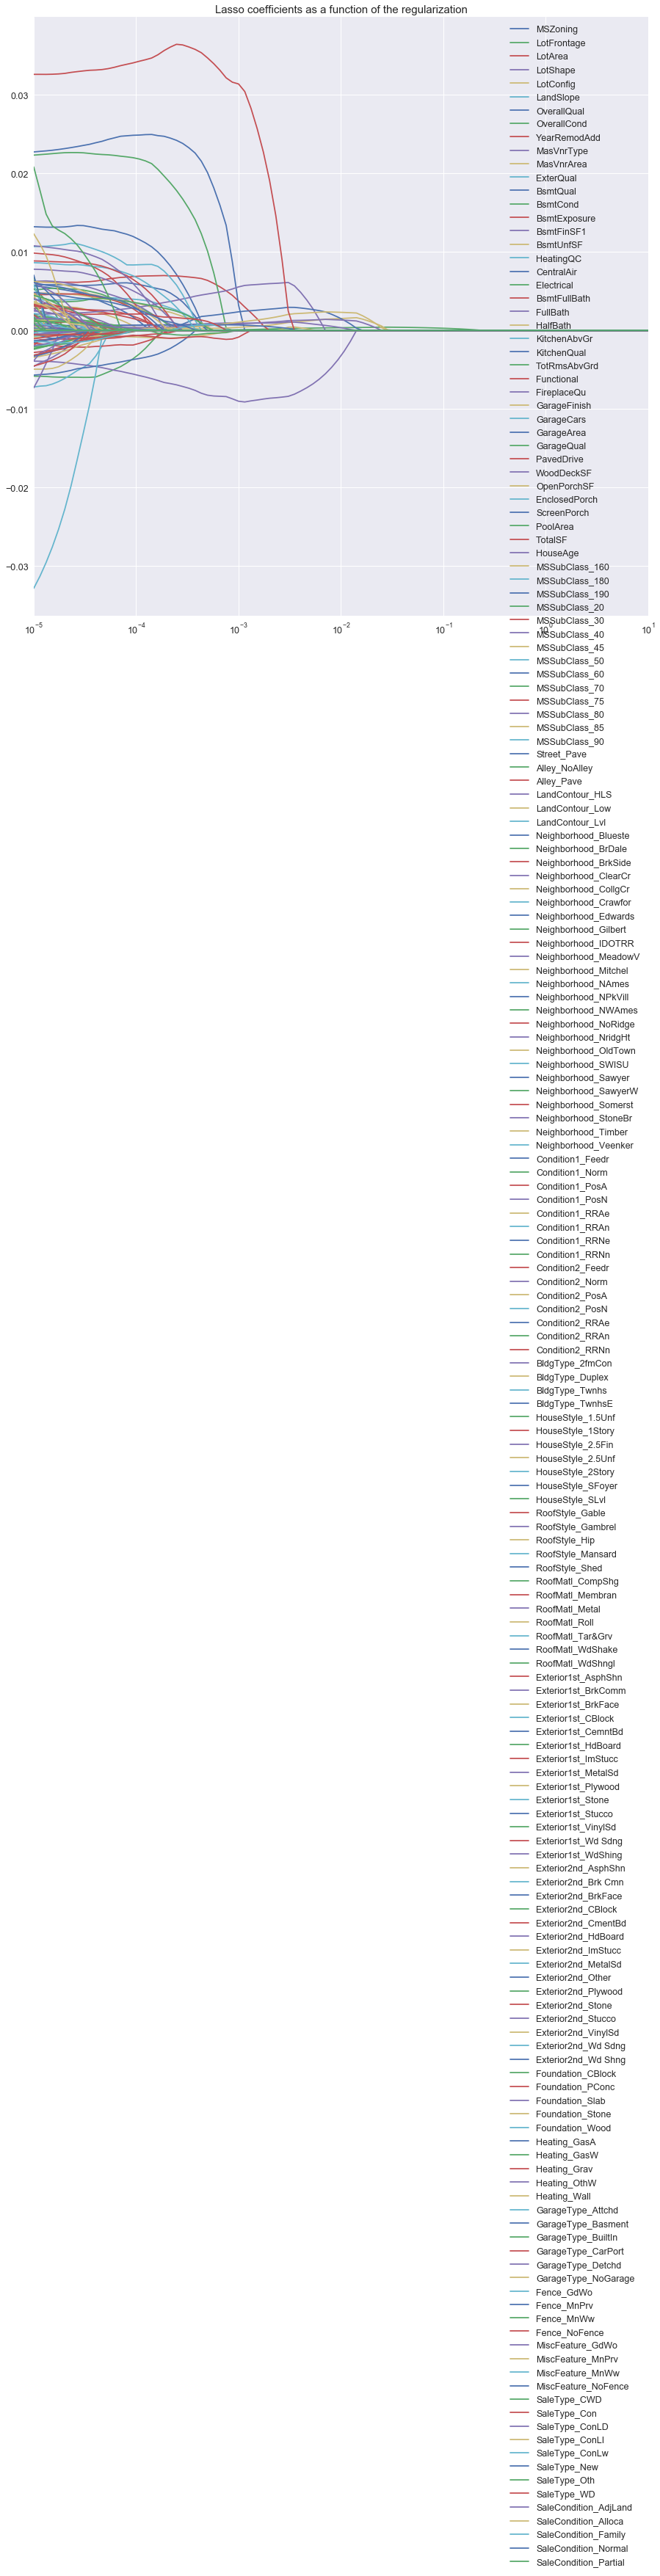

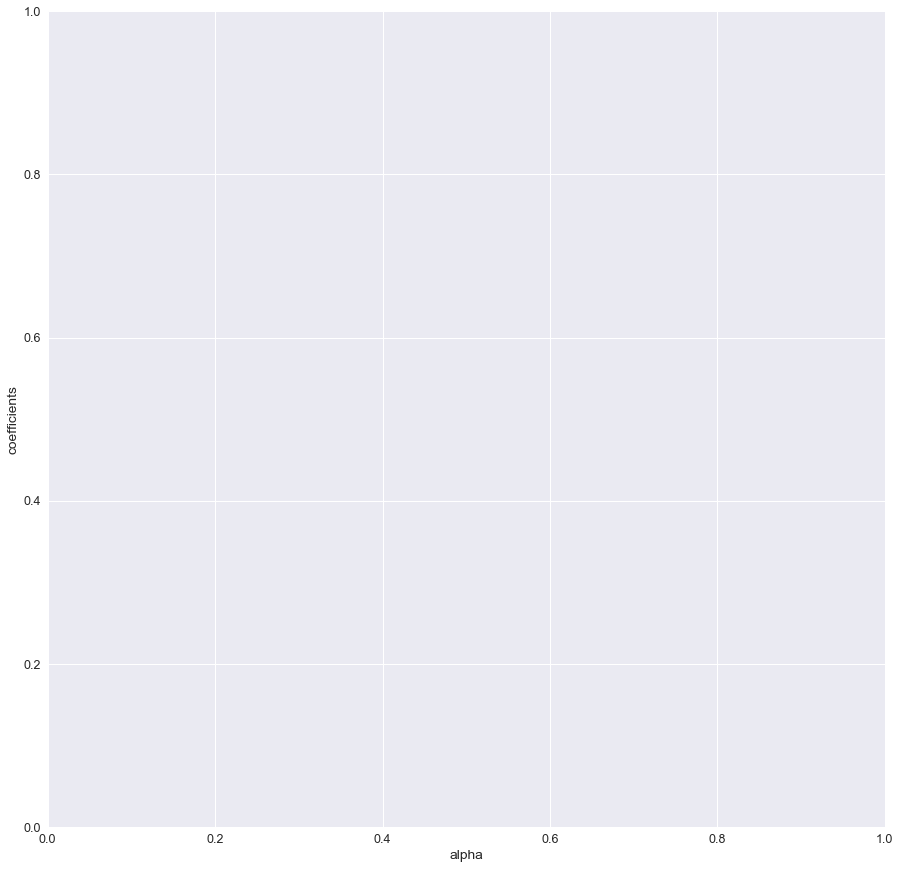

In [346]:
columns = train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice']
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, figsize=(15,15))
plt.figure(figsize=(15,15))
plt.xlabel('alpha')
plt.ylabel('coefficients')

plt.show()


In [350]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
#define a function returning the cross validation rmse error 

In [351]:
model_lasso = LassoCV(alphas = np.logspace(-5,5,100)).fit(x, y)  #using built in LassoCV to figure out best alpha 


In [352]:
model_lasso.alpha_


4.037017258596558e-05

In [353]:
rmse_cv(model_lasso).mean() #cross validation is just to test for the alpha 


0.0099303197735609843

In [354]:
coef = pd.Series(model_lasso.coef_, index = train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice'])

In [355]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 78 variables and eliminated the other 110 variables


In [356]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])


Text(0.5,1,'Coefficients in the Lasso Model')

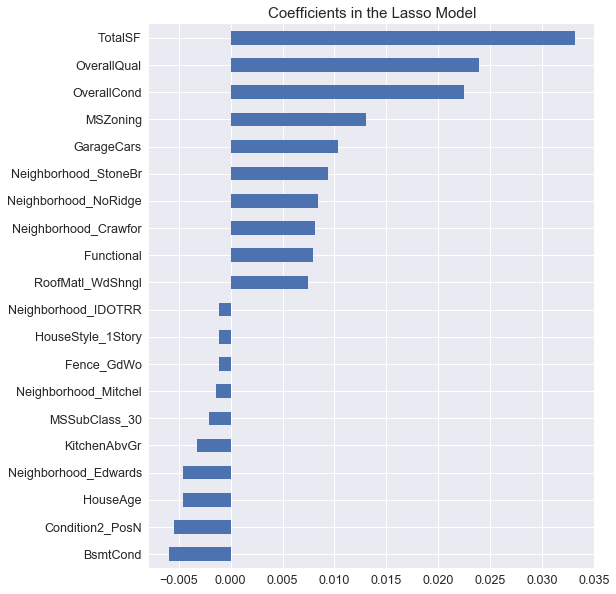

In [357]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
#this is all the coefficients at best alpha (but just one alpha. the order will change though )

In [358]:
X_train_RL = train_normalized_dummies.loc[:,train_normalized_dummies.columns != 'SalePrice'] #all of dataframe minus sale price?
#X_test_RL = train_normalized_dummies[train_normalized_dummies.shape[0]:]  #empty data frame with just column headers?
y_RL = train_normalized_dummies.SalePrice


In [359]:
import numpy as np
import pprint


print('Shape: (%d, %d)' %X_train_RL.shape)
print('Variation:')
pprint.pprint(dict(zip(train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice'], np.var(X_train_RL, 0))))

Shape: (1460, 188)
Variation:
{'Alley_NoAlley': 0.058443891912178983,
 'Alley_Pave': 0.027293582285607007,
 'BldgType_2fmCon': 0.020782041658848123,
 'BldgType_Duplex': 0.034347907674986244,
 'BldgType_Twnhs': 0.028584631262900662,
 'BldgType_TwnhsE': 0.071985363107524056,
 'BsmtCond': 0.052903291223780666,
 'BsmtExposure': 0.13354206381444439,
 'BsmtFinSF1': 8.9462453473142212,
 'BsmtFullBath': 0.12230321044569975,
 'BsmtQual': 0.077988351715431739,
 'BsmtUnfSF': 3.4350368185616609,
 'CentralAir': 0.029228159401314346,
 'Condition1_Feedr': 0.052401482454493456,
 'Condition1_Norm': 0.11822105460686892,
 'Condition1_PosA': 0.005449427659973769,
 'Condition1_PosN': 0.012844342278100737,
 'Condition1_RRAe': 0.0074774817038845516,
 'Condition1_RRAn': 0.017491086507787221,
 'Condition1_RRNe': 0.0013679864890223427,
 'Condition1_RRNn': 0.0034129292550197387,
 'Condition2_Feedr': 0.0040927003190091103,
 'Condition2_Norm': 0.010168418089697625,
 'Condition2_PosA': 0.00068446237568020899,
 'Con

In [360]:
import sklearn.feature_selection as fs
x_new = fs.VarianceThreshold(threshold = .001).fit_transform(X_train_RL)
x_new.shape

(1460, 176)

# Decision Tree

In [ ]:
#creating train test split 
y=train_tree_Sale["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(train_knn_LotFrontage, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [413]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(max_depth=5)

In [414]:
tree_model.fit(X_train_RL, y_RL)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [415]:
tree_model.score(X_train_RL,y_RL)

0.85002032446586651

In [416]:
scores = cross_val_score(tree_model, X_train_RL, y_RL, cv=10)
scores

array([ 0.67476908,  0.82629113,  0.79701862,  0.76398959,  0.77608862,
        0.73939009,  0.72637013,  0.8112136 ,  0.77681451,  0.80933618])

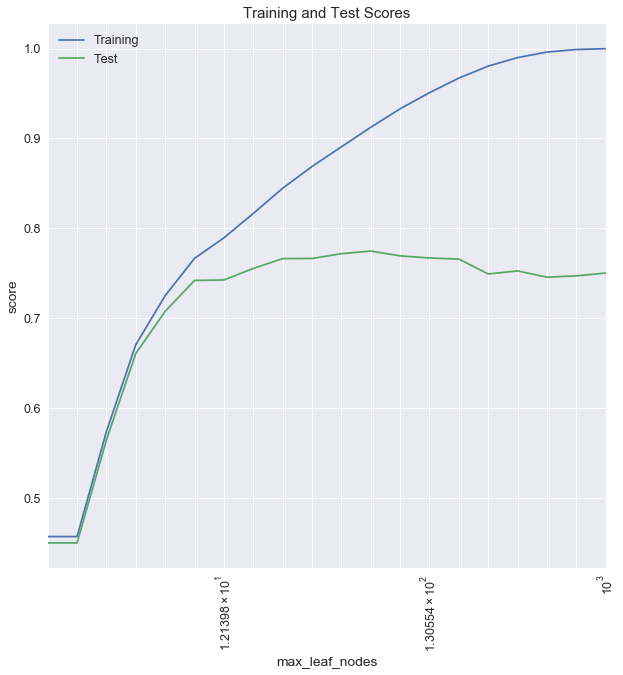

In [436]:
scores = []
domrange = np.logspace(0.2,3,20)
for i in domrange:
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = int(round(i)))
    tree_model.fit(X_train_RL,y_RL)
    scores.append([tree_model.score(X_train_RL,y_RL),np.mean(cross_val_score(tree_model, X_train_RL, y_RL, cv=10))])
df_coef = pd.DataFrame(scores, index=domrange, columns=['Training','Test'])
title = 'Training and Test Scores'
df_coef.plot(logx=True, title=title, figsize = (10,10))
plt.xlabel('max_leaf_nodes')
plt.xticks(domrange,rotation=90)
plt.ylabel('score')
plt.show()

In [417]:
print(tree_model.feature_importances_)

feature_importance = list(zip(X_train_RL.columns, tree_model.feature_importances_))
dtype = [('feature', 'S15'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
feature_sort


[ 0.01048943  0.          0.00267258  0.          0.          0.
  0.55753647  0.00404844  0.01002619  0.          0.          0.
  0.00669798  0.          0.          0.00311284  0.0085648   0.          0.0394911
  0.          0.          0.          0.          0.          0.          0.
  0.          0.00544664  0.          0.02456434  0.00122758  0.          0.
  0.          0.00103079  0.          0.          0.          0.30383365
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00580427  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.    

array([(b'OverallQual',  0.55753647), (b'TotalSF',  0.30383365),
       (b'CentralAir',  0.0394911 ), (b'GarageCars',  0.02456434),
       (b'MSZoning',  0.01048943), (b'YearRemodAdd',  0.01002619),
       (b'GarageType_Detc',  0.00915999), (b'BsmtUnfSF',  0.0085648 ),
       (b'BsmtQual',  0.00669798), (b'Neighborhood_Ed',  0.00580427),
       (b'FireplaceQu',  0.00544664), (b'OverallCond',  0.00404844),
       (b'BsmtFinSF1',  0.00311284), (b'RoofStyle_Hip',  0.00292732),
       (b'LotArea',  0.00267258), (b'Exterior2nd_Brk',  0.00238965),
       (b'GarageArea',  0.00122758), (b'OpenPorchSF',  0.00103079),
       (b'Exterior2nd_Vin',  0.00097594), (b'WoodDeckSF',  0.        ),
       (b'TotRmsAbvGrd',  0.        ), (b'Street_Pave',  0.        ),
       (b'ScreenPorch',  0.        ), (b'SaleType_WD',  0.        ),
       (b'SaleType_Oth',  0.        ), (b'SaleType_New',  0.        ),
       (b'SaleType_ConLw',  0.        ), (b'SaleType_ConLI',  0.        ),
       (b'SaleType_ConLD', 

In [384]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.73 (+/- 0.11)


In [400]:
np.mean(cross_val_score(tree_model, X_train_RL, y_RL ,cv=10))

0.77318428505903858

In [386]:
tree_model.fit(X_train_RL, y_RL)
train_error = (1 - tree_model.score(X_train_RL, y_RL))
#test_error = (1 - tree_model.score(X_train_RL, y_RL))
print("The training error is: %.5f" %train_error)
#print("The test     error is: %.5f" %test_error)

The training error is: 0.00002
The test     error is: 0.00002


# random forest


In [418]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [389]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

In [420]:
train_models=train_normalized_dummies.copy()


In [421]:
train_models.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrType',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [422]:


# Create a list of feature names
feat_labels = train_models.columns

# Create X from the features
X = train_models.loc[:,train_models.columns != 'SalePrice']
#train_normalized_dummies.loc[:,train_normalized_dummies.columns != 'SalePrice']
# Create y from output
y = train_models.SalePrice

In [424]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [426]:
# Create a random forest regressor
clf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the regressor
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('MSZoning', 0.01368350050739528)
('LotFrontage', 0.0083525489685305696)
('LotArea', 0.012801241147471509)
('LotShape', 0.0014722029699964867)
('LotConfig', 0.00019258342266373528)
('LandSlope', 0.00043960460098235927)
('OverallQual', 0.38326652968768254)
('OverallCond', 0.015431899280318889)
('YearRemodAdd', 0.010321572802749099)
('MasVnrType', 0.00024911635744130113)
('MasVnrArea', 0.0040005492787174102)
('ExterQual', 0.0013785612963571189)
('BsmtQual', 0.0049488449926458084)
('BsmtCond', 0.00078840804832737074)
('BsmtExposure', 0.0020662941018707729)
('BsmtFinSF1', 0.009260897363814356)
('BsmtUnfSF', 0.010172014815889922)
('HeatingQC', 0.0013061688271127393)
('CentralAir', 0.027996176743380022)
('Electrical', 0.00043400271049863124)
('BsmtFullBath', 0.00093226906910655956)
('FullBath', 0.0018131050207798721)
('HalfBath', 0.0015311790673936741)
('KitchenAbvGr', 0.0017331565200467431)
('KitchenQual', 0.0052560386460744962)
('TotRmsAbvGrd', 0.0022875680603586987)
('Functional', 0.00290

In [427]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.005)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.005)

In [428]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


MSZoning
LotFrontage
LotArea
OverallQual
OverallCond
YearRemodAdd
BsmtFinSF1
BsmtUnfSF
CentralAir
KitchenQual
GarageArea
GarageQual
SalePrice
TotalSF


In [429]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [431]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [433]:


# View The Accuracy Of Our Full Feature (4 Features) Model
clf.score(X_test, y_test)

0.8780457475453638

In [435]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
clf_important.score(X_important_test, y_test)

0.87577388188318972

In [449]:
clf.set_params(oob_score=True, random_state=42)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [450]:
clf.oob_score_

0.87413297910326693

# Linear Model

In [438]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [439]:
lm.score(X,y)

0.93356749497412872

In [440]:
np.mean(cross_val_score(lm, X, y, cv=10))

0.84701298660298963

# Ridge Regression

In [443]:
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(X, y) # fit data
ridge.coef_, ridge.intercept_ 

(array([  1.27236146e-02,  -1.85835245e-05,   6.42170903e-03,
          4.88952945e-04,   3.41121941e-03,  -3.99923789e-03,
          2.15172717e-02,   2.13472031e-02,   5.55236067e-03,
          1.35504200e-03,  -9.20779727e-05,   3.26980638e-04,
          1.28381997e-03,  -6.35360054e-03,   2.66527700e-03,
          5.79896196e-04,  -6.12291718e-04,   3.94332446e-03,
          6.36092913e-03,  -2.81009113e-03,   3.24303524e-03,
          6.56728345e-03,   4.82393839e-03,  -7.34290150e-03,
          5.89674157e-03,   5.82108862e-03,   1.00639421e-02,
          2.05626274e-03,   1.53611240e-03,   1.09805896e-02,
         -2.42631385e-04,   6.41419891e-03,   1.75122834e-03,
          2.60782821e-04,   1.57407739e-04,   1.79499671e-04,
          6.42183167e-04,   1.66501712e-04,   3.12841897e-02,
         -3.71314538e-03,  -2.98469189e-03,   3.07200667e-03,
         -2.22720027e-03,   1.61086065e-03,  -1.73571048e-03,
         -1.05226258e-03,  -2.24816277e-03,   6.21931188e-04,
        

In [444]:
print("The determination of ridge regression is: %.4f" %ridge.score(X, y))

The determination of ridge regression is: 0.9259


In [445]:
ridge = linear_model.Ridge()

In [446]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X, y)
    coef.append(ridge.coef_)

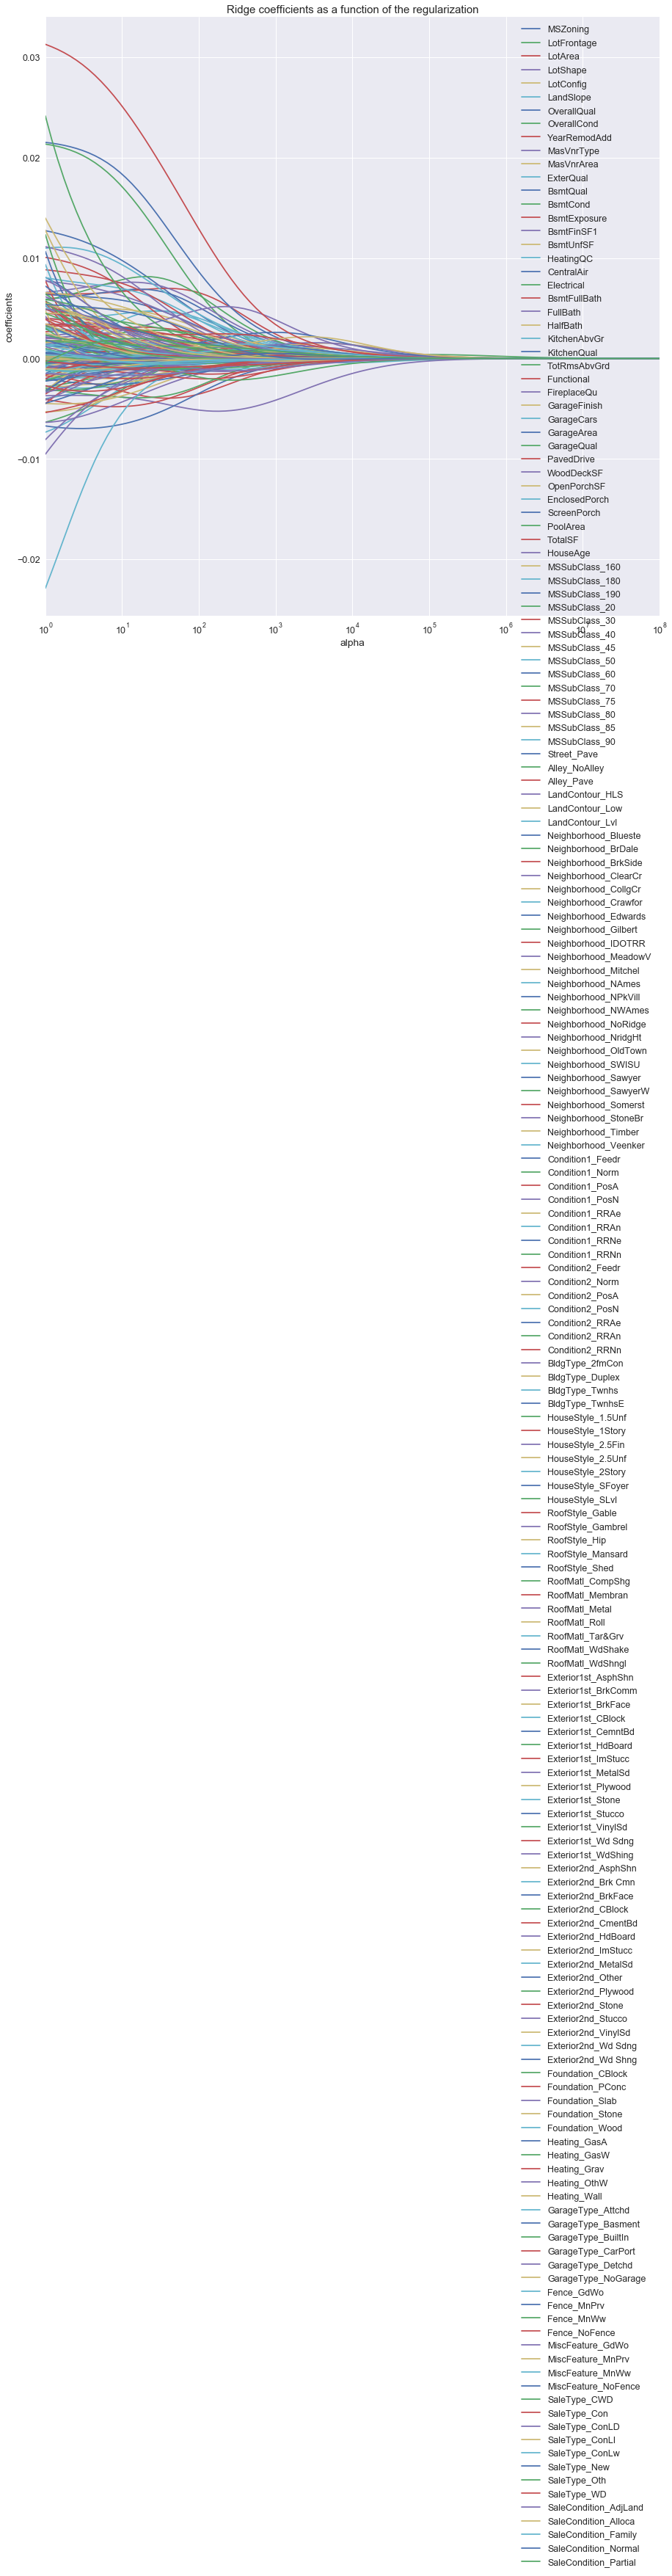

In [448]:
columns = train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice']
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title, figsize=(15,15))
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()